In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
#il faut trandormer les données en données numérique

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for each in df.columns:
    df[each] = le.fit_transform(df[each])

In [6]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [7]:
df.shape

(8124, 23)

In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [10]:
#trés bien :pas de valeurs nulles , tous les données sont de type int64

In [11]:
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [12]:
#quelques plot :

Text(0, 0.5, 'class')

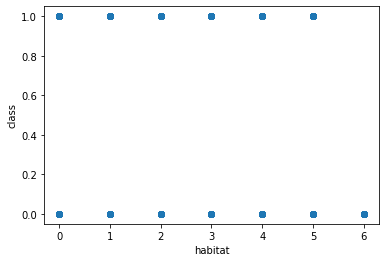

In [13]:
plt.scatter(df['habitat'],df['class'])
plt.xlabel('habitat')
plt.ylabel('class')

Text(0, 0.5, 'class')

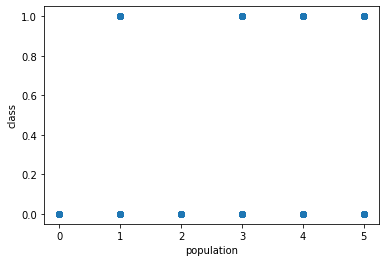

In [14]:
plt.scatter(df['population'],df['class'])
plt.xlabel('population')
plt.ylabel('class')

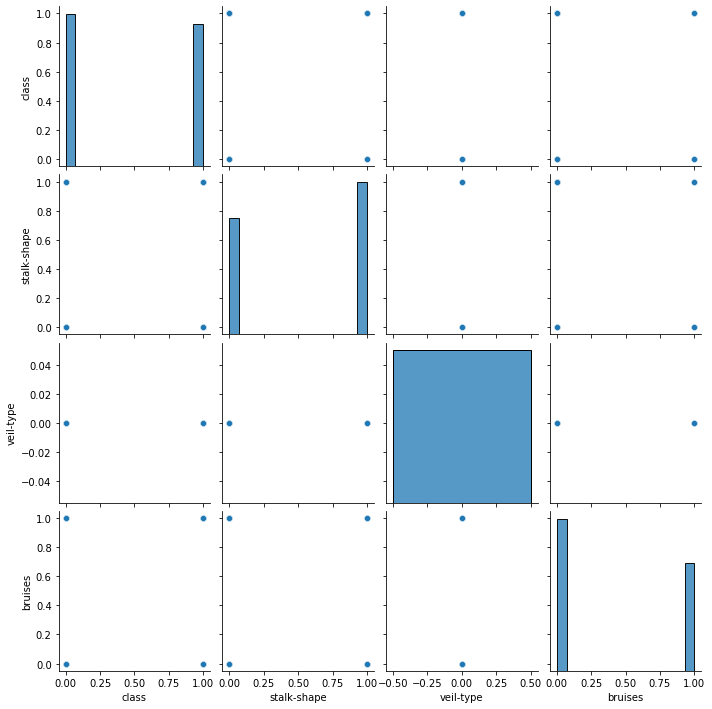

In [18]:
sns.pairplot(df[['class', 'stalk-shape', 'veil-type', 'bruises']] )

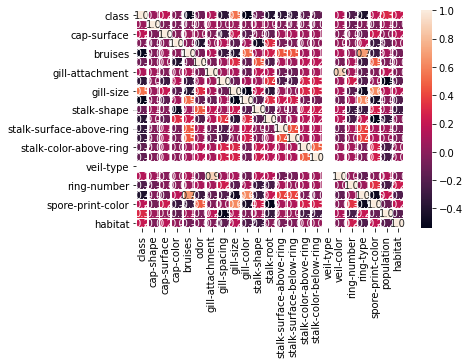

In [19]:

sns.heatmap(df.corr(), annot=True, fmt=".1f", linewidths=.5);

In [20]:
#beaucoup des colonnes les résultat n'est pas clair

In [21]:
columns = df.columns
columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [23]:
columns1 = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor','gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring']
columns2 = ['class','stalk-color-above-ring','stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number','ring-type', 'spore-print-color', 'population', 'habitat']

In [24]:
df1 = df[columns1]
df2 = df[columns2]

In [25]:
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2


In [26]:
df2.head()

,class,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,7,7,0,2,1,4,2,3,5
1,0,7,7,0,2,1,4,3,2,1
2,0,7,7,0,2,1,4,3,2,3
3,1,7,7,0,2,1,4,2,3,5
4,0,7,7,0,2,1,0,3,0,1


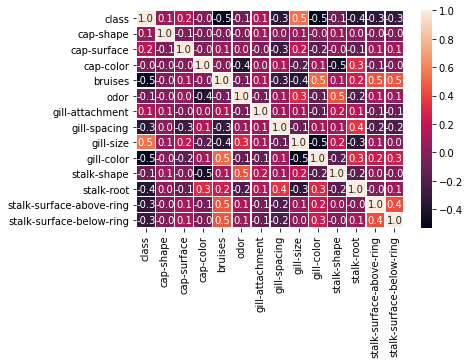

In [27]:
sns.heatmap(df1.corr(), annot=True, fmt=".1f", linewidths=.5);

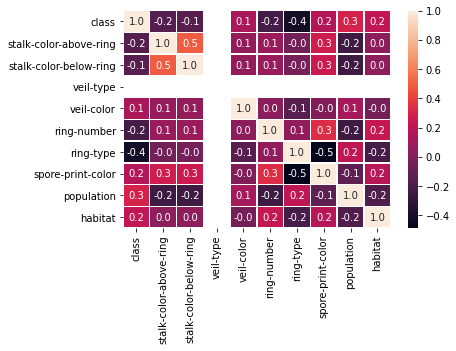

In [28]:

sns.heatmap(df2.corr(), annot=True, fmt=".1f", linewidths=.5);

In [29]:
#avec cette méthode on peut voir les colonnes qui influent sur la classe de mushrooms

In [30]:
df['veil-type'].value_counts()

0    8124
Name: veil-type, dtype: int64

In [31]:
df.drop('veil-type',axis=1,inplace=True)

In [32]:
#d'aprés df1 la valeur de 'cap-color' n'a aucun influence sur la classe

In [33]:
df.drop('cap-color',axis=1,inplace=True)

In [34]:
x = df.drop('class',axis=1)
y = df['class']

In [35]:
x_train , x_test ,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [36]:
x_train.shape

(6499, 20)

In [37]:
#modéle 1

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc = RandomForestClassifier(n_estimators=200,criterion='entropy',n_jobs=-1)

In [40]:
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

1.0

In [42]:
#trés bien

In [43]:
#je veut essayer juste le modéle de lgb

In [45]:
import lightgbm as lgb
trn_data = lgb.Dataset(x_train, label=y_train)
val_data = lgb.Dataset(x_test, label=y_test)

In [46]:
weight = 10
param = { 'num_leaves': 80,
    'boost': 'gbdt',
    'learning_rate': 0.03,
    'metric':'binary_logloss',
    'scale_pos_weight': round(weight, 1),
    
 
    
    'objective': 'binary',
    'random_state': 42,
    
}

lgb_model = lgb.train(param, trn_data, 5000, valid_sets = [trn_data, val_data], 
                      verbose_eval=200, early_stopping_rounds=200)

Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.00129618	valid_1's binary_logloss: 0.00133843
[400]	training's binary_logloss: 3.59349e-06	valid_1's binary_logloss: 3.67411e-06
[600]	training's binary_logloss: 4.1025e-07	valid_1's binary_logloss: 4.0865e-07
[800]	training's binary_logloss: 3.2896e-07	valid_1's binary_logloss: 3.1332e-07
[1000]	training's binary_logloss: 3.03567e-07	valid_1's binary_logloss: 2.84679e-07
[1200]	training's binary_logloss: 2.89374e-07	valid_1's binary_logloss: 2.68804e-07
[1400]	training's binary_logloss: 2.80031e-07	valid_1's binary_logloss: 2.58916e-07
[1600]	training's binary_logloss: 2.73176e-07	valid_1's binary_logloss: 2.51009e-07
[1800]	training's binary_logloss: 2.67699e-07	valid_1's binary_logloss: 2.44492e-07
[2000]	training's binary_logloss: 2.62602e-07	valid_1's binary_logloss: 2.37967e-07
[2200]	training's binary_logloss: 2.58792e-07	valid_1's binary_logloss: 2.34186e-07
[2400]	training's binar

In [47]:
pred = lgb_model.predict(x_test,num_iteration=lgb_model.best_iteration)

In [50]:
pred

array([3.20177840e-08, 1.62333013e-08, 9.99999982e-01, ...,
       3.33833076e-08, 4.20976047e-08, 1.51599406e-06])

In [51]:
threshold = 0.5
pred  = (pred >=threshold)*1

In [52]:
pred

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
from sklearn.metrics import f1_score
f1_score(pred,y_test)

1.0

In [54]:
accuracy_score(pred,y_test)

1.0